# **Car Price Prediction**

**Mục tiêu:**
Xây dựng Pipeline học máy truyền thống cho vấn đề trên.

1.  **EDA (Exploratory Data Analysis):**
    *   Thống kê mô tả dữ liệu, trực quan hóa để hiểu rõ các biến.
    *   Phát hiện dữ liệu thiếu, giá trị ngoại lai và xu hướng phân phối.

2.  **Tiền xử lý dữ liệu (Data Preprocessing):**
    *   Làm sạch dữ liệu, xử lý các giá trị bị thiếu.
    *   Mã hóa dữ liệu phân loại (One-Hot Encoding, Label Encoding).
    *   Chuẩn hóa dữ liệu số (StandardScaler, MinMaxScaler).
    *   Chia tập dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test).

3.  **Trích xuất và lựa chọn đặc trưng (Feature Engineering & Selection):**
    *   Tạo ra các đặc trưng mới có ý nghĩa hơn từ dữ liệu gốc (ví dụ: tuổi của xe).
    *   Lựa chọn những đặc trưng quan trọng nhất để đưa vào mô hình.

4.  **Huấn luyện mô hình (Model Training):**
    *   Áp dụng các thuật toán học máy phù hợp cho bài toán **hồi quy (regression)** như:
        *   Logistic Regression
        *   SVM
        *   Random Forest

5.  **Đánh giá mô hình (Model Evaluation):**
    *   Sử dụng các chỉ số đánh giá cho bài toán hồi quy:
        *   Accuracy
        *   Precision
        *   Recall
        *   F1-score

**Yêu cầu:**
* Các nhóm không được chọn trùng tập dữ liệu.
* Tập dữ liệu phải có missing value để sinh viên thực hành kỹ thuật imputation.
* Tập dữ liệu phải có categorical value để sinh viên thực hành các kỹ thuật
encoding.
* Số lượng mẫu (sample size) đủ lớn để pipeline có ý nghĩa; việc lựa chọn cụ thể
nên được thảo luận trực tiếp với giảng viên trên lớp.

**Nhiệm vụ:** mỗi nhóm phải xây dựng một pipeline học máy truyền thống cho
dữ liệu dạng bảng. Pipeline này phải được thiết kế sao cho cho phép cấu hình các kỹ
thuật và tham số ở từng bước. Ví dụ:
* Scaling: có thể lựa chọn MinMaxScaler hoặc StandardScaler; nếu chọn MinMaxScaler,
sinh viên cần cấu hình feature_range.
* Giảm số chiều: có thể lựa chọn PCA với các mức giữ lại phương sai khác nhau
(90%, 95%, ...).
* Mô hình: có thể lựa chọn Logistic Regression, SVM, Random Forest và so sánh
kết quả.

Kết quả cuối cùng cần bao gồm: báo cáo phân tích EDA, mô tả pipeline, các tham
số đã thử nghiệm, và so sánh hiệu quả giữa các cấu hình.

## **1. Thiết lập môi trường và Tải dữ liệu**



### **1.1 Import thư viện và cấu hình Kaggle API từ Secrets**

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import pandas as pd
from google.colab import userdata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown
sns.set_style("whitegrid")
print("Các thư viện đã được import và cấu hình.")

# Tự động cấu hình Kaggle API
os.environ['KAGGLE_USERNAME'] = 'nguyenk512'
os.environ['KAGGLE_KEY'] = '187454a718c857637f7319f39e33b509'

Các thư viện đã được import và cấu hình.


### **1.2 Tải, giải nén và đọc dữ liệu**

In [130]:
!pip install kaggle --quiet
!kaggle datasets download -d deepcontractor/car-price-prediction-challenge -p ./data

# Thêm cờ -o để tự động ghi đè file cũ, tránh bị hỏi và gây lỗi
!unzip -o -q ./data/car-price-prediction-challenge.zip -d ./data

# Đọc file 'train.csv' (đây là file dữ liệu huấn luyện)
try:
    df = pd.read_csv('./data/car_price_prediction.csv')
    print("\nĐọc dataset thành công!")
except FileNotFoundError:
    print("\nLỗi: Không tìm thấy dataset. Vui lòng kiểm tra lại kết quả lệnh 'ls' ở trên.")

Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge
License(s): CC0-1.0
car-price-prediction-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)

Đọc dataset thành công!


## **2. EDA (Exploratory Data Analysis) và Tiền xử lí (Data Preprocessing)**

### **2.1 Tổng quan dữ liệu**

#### **Thông tin tổng quan về các cột**

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

#### **Kiểm tra missing value**

In [132]:
df.isna().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


#### **Kiểm tra trùng lặp dữ liệu**

In [133]:
print("Dữ liệu bị trùng lặp: ", df.duplicated().sum())
print("Tỉ lệ dữ liệu bị trùng lặp: ", df.duplicated().sum() * 100 / len(df), "%")
df.drop_duplicates(inplace=True)
print("\nDữ liệu sau khi loại bỏ trùng lặp: ")
df.shape

Dữ liệu bị trùng lặp:  313
Tỉ lệ dữ liệu bị trùng lặp:  1.6270728284035971 %

Dữ liệu sau khi loại bỏ trùng lặp: 


(18924, 18)

### **2.2 Thống kê mô tả cơ bản**



#### **2.2.1 Phân tích các biến số (Numerical Variables)**


In [134]:
df.describe(include="number")

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


#### **2.2.2 Phân tích các biến phân loại (Categorical Variables)**


In [135]:
df.describe(include="object")

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5709,3729,1069,8600,13731,9944,3856,714,13282,12695,18032,17471,4944


In [136]:


# Lấy danh sách các cột dạng phân loại
categorical_cols = df.select_dtypes(include=['object']).columns

def summarize_categorical_column(col_name):
    """
    Tóm tắt thông tin của một cột phân loại một cách trực quan và đầy đủ,
    gom mọi thứ vào một khối duy nhất.
    """

    # --- 1. Thu thập thông tin ---
    value_counts = df[col_name].value_counts()
    nunique = df[col_name].nunique()
    missing_count = df[col_name].isnull().sum()

    # --- 2. Tạo và hiển thị bảng tóm tắt bằng Markdown ---
    summary_md = f"""
<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>{col_name}</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> {nunique}</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> {missing_count}</li>
    </ul>
</div>
"""
    display(Markdown(summary_md))

    # --- 3. Hiển thị bảng tần suất chi tiết ---
    print("Bảng tần suất chi tiết:")
    value_counts_df = value_counts.to_frame(name='Tần suất')
    value_counts_df['Tỷ lệ (%)'] = (df[col_name].value_counts(normalize=True) * 100).round(2)

    # Hiển thị toàn bộ bảng, notebook sẽ tự thêm thanh cuộn
    with pd.option_context('display.max_rows', 20):
        display(value_counts_df)

    print("Số giá trị duy nhất :")
    print(df[col].nunique())
    print(df[col].unique())


    print("="*80 + "\n")


# Lấy danh sách các cột dạng phân loại
categorical_cols = df.select_dtypes(include=['object']).columns

# Lặp qua từng cột và gọi hàm tóm tắt mới
for col in categorical_cols:
    summarize_categorical_column(col)


<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Levy</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 559</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Levy,,
-,5709,30.17
765,482,2.55
891,453,2.39
639,403,2.13
640,398,2.10
...,...,...
2308,1,0.01
4860,1,0.01
1641,1,0.01


Số giá trị duy nhất :
559
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '7


<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Manufacturer</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 65</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Manufacturer,,
HYUNDAI,3729,19.71
TOYOTA,3606,19.06
MERCEDES-BENZ,2043,10.80
FORD,1088,5.75
CHEVROLET,1047,5.53
...,...,...
LAMBORGHINI,1,0.01
PONTIAC,1,0.01
SATURN,1,0.01


Số giá trị duy nhất :
65
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Model</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 1590</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Model,,
Prius,1069,5.65
Sonata,1067,5.64
Camry,929,4.91
Elantra,910,4.81
E 350,534,2.82
...,...,...
Vito Exstralong,1,0.01
Versa SE,1,0.01
Fusion HYBRID SE,1,0.01


Số giá trị duy nhất :
1590
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Category</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 11</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Category,,
Sedan,8600,45.44
Jeep,5378,28.42
Hatchback,2799,14.79
Minivan,633,3.34
Coupe,528,2.79
Universal,361,1.91
Microbus,299,1.58
Goods wagon,229,1.21
Pickup,51,0.27


Số giá trị duy nhất :
11
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Leather interior</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 2</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Leather interior,,
Yes,13731,72.56
No,5193,27.44


Số giá trị duy nhất :
2
['Yes' 'No']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Fuel type</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 7</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Fuel type,,
Petrol,9944,52.55
Diesel,4001,21.14
Hybrid,3539,18.70
LPG,885,4.68
CNG,469,2.48
Plug-in Hybrid,85,0.45
Hydrogen,1,0.01


Số giá trị duy nhất :
7
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Engine volume</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 107</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Engine volume,,
2,3856,20.38
2.5,2246,11.87
1.8,1743,9.21
1.6,1446,7.64
1.5,1289,6.81
...,...,...
5.4 Turbo,1,0.01
0.3 Turbo,1,0.01
5.2,1,0.01


Số giá trị duy nhất :
107
['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3' '2.0 Turbo'
 '2.2 Turbo' '4.7' '1.5' '4.4' '3.0 Turbo' '1.4 Turbo' '3.6' '2.3'
 '1.5 Turbo' '1.6 Turbo' '2.2' '2.3 Turbo' '1.4' '5.5' '2.8 Turbo' '3.2'
 '3.8' '4.6' '1.2' '5' '1.7' '2.9' '0.5' '1.8 Turbo' '2.4 Turbo'
 '3.5 Turbo' '1.9' '2.7' '4.8' '5.3' '0.4' '2.8' '3.2 Turbo' '1.1' '2.1'
 '0.7' '5.4' '1.3 Turbo' '3.7' '1' '2.5 Turbo' '2.6' '1.9 Turbo'
 '4.4 Turbo' '4.7 Turbo' '0.8' '0.2 Turbo' '5.7' '4.8 Turbo' '4.6 Turbo'
 '6.7' '6.2' '1.2 Turbo' '3.4' '1.7 Turbo' '6.3 Turbo' '2.7 Turbo' '4.3'
 '4.2' '2.9 Turbo' '0' '4.0 Turbo' '20' '3.6 Turbo' '0.3' '3.7 Turbo'
 '5.9' '5.5 Turbo' '0.2' '2.1 Turbo' '5.6' '6' '0.7 Turbo' '0.6 Turbo'
 '6.8' '4.5' '0.6' '7.3' '0.1' '1.0 Turbo' '6.3' '4.5 Turbo' '0.8 Turbo'
 '4.2 Turbo' '3.1' '5.0 Turbo' '6.4' '3.9' '5.7 Turbo' '0.9' '0.4 Turbo'
 '5.4 Turbo' '0.3 Turbo' '5.2' '5.8' '1.1 Turbo']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Mileage</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 7687</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Mileage,,
0 km,714,3.77
200000 km,181,0.96
150000 km,159,0.84
160000 km,120,0.63
180000 km,117,0.62
...,...,...
21178 km,1,0.01
110539 km,1,0.01
388495 km,1,0.01


Số giá trị duy nhất :
7687
['186005 km' '192000 km' '200000 km' ... '140607 km' '307325 km'
 '186923 km']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Gear box type</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 4</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Gear box type,,
Automatic,13282,70.19
Tiptronic,3065,16.20
Manual,1844,9.74
Variator,733,3.87


Số giá trị duy nhất :
4
['Automatic' 'Tiptronic' 'Variator' 'Manual']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Drive wheels</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 3</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Drive wheels,,
Front,12695,67.08
4x4,3969,20.97
Rear,2260,11.94


Số giá trị duy nhất :
3
['4x4' 'Front' 'Rear']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Doors</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 3</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Doors,,
04-May,18032,95.29
02-Mar,768,4.06
>5,124,0.66


Số giá trị duy nhất :
3
['04-May' '02-Mar' '>5']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Wheel</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 2</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Wheel,,
Left wheel,17471,92.32
Right-hand drive,1453,7.68


Số giá trị duy nhất :
2
['Left wheel' 'Right-hand drive']




<div style="border: 1px solid #e0e0e0; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <h3 style="margin-top: 0;">Phân tích cột: <code>Color</code></h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>Số lượng giá trị duy nhất:</strong> 16</li>
        <li><strong>Số lượng giá trị thiếu (missing):</strong> 0</li>
    </ul>
</div>


Bảng tần suất chi tiết:


,Tần suất,Tỷ lệ (%)
Color,,
Black,4944,26.13
White,4407,23.29
Silver,3729,19.71
Grey,2343,12.38
Blue,1376,7.27
Red,622,3.29
Green,321,1.70
Orange,252,1.33
Brown,185,0.98


Số giá trị duy nhất :
16
['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Red' 'Sky blue' 'Orange'
 'Yellow' 'Brown' 'Golden' 'Beige' 'Carnelian red' 'Purple' 'Pink']



#### **2.2.3 Dọn dẹp dữ liệu (Data Cleaning)**

Trong phần này, chúng ta sẽ làm sạch các cột để chúng có đúng định dạng số và xử lý các giá trị thiếu.

In [137]:
# --- Xử lý cột 'Levy' ---
# 1. Chuyển đổi giá trị '-' thành giá trị thiếu chuẩn (NaN)
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')

# 2. Điền các giá trị thiếu bằng giá trị trung vị (median)
levy_median = df['Levy'].median()

# --- SỬA LỖI WARNING TẠI ĐÂY ---
# Thay vì dùng inplace=True trên slice, hãy gán kết quả trở lại
df['Levy'] = df['Levy'].fillna(levy_median)

print(f"Cột 'Levy': Các giá trị thiếu đã được điền bằng median ({levy_median}).")


# --- Xử lý cột 'Mileage' ---
# Tách số ra khỏi chuỗi "km" và chuyển thành dạng số
df['Mileage'] = df['Mileage'].str.split(' ').str[0]
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
print("Cột 'Mileage': Đã chuyển sang dạng số.")


# --- Xử lý cột 'Engine volume' ---
# Tách số ra khỏi chuỗi "Turbo" và chuyển thành dạng số
df['Engine volume'] = df['Engine volume'].str.split(' ').str[0]
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')
print("Cột 'Engine volume': Đã chuyển sang dạng số.")


if 'Doors' in df.columns:
    # 1. Tạo một bản đồ (mapping) để chuyển đổi các giá trị chuỗi sang số
    door_mapping = {
        '02-Mar': 2,
        '04-May': 4,
        '>=5': 5
    }

    # 2. Áp dụng bản đồ để cập nhật lại cột 'Doors'
    df['Doors'] = df['Doors'].map(door_mapping)
print("Cột 'Doors': Đã chuyển sang dạng số.")
print("\n--- Dọn dẹp dữ liệu hoàn tất! ---")
# Kiểm tra lại các giá trị thiếu sau khi xử lý
df.info()

Cột 'Levy': Các giá trị thiếu đã được điền bằng median (781.0).
Cột 'Mileage': Đã chuyển sang dạng số.
Cột 'Engine volume': Đã chuyển sang dạng số.
Cột 'Doors': Đã chuyển sang dạng số.

--- Dọn dẹp dữ liệu hoàn tất! ---
<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type

### **2.3 Phân phối xác suất các biến**

In [138]:
numerical_cols = list(df.select_dtypes(include="number").columns)
categorical_cols = list(df.select_dtypes(exclude="number").columns)

#### **2.3.1 Phân phối của các biến số (Numerical Features)**

--- Phân tích phân phối và phát hiện ngoại lai cho các biến số ---


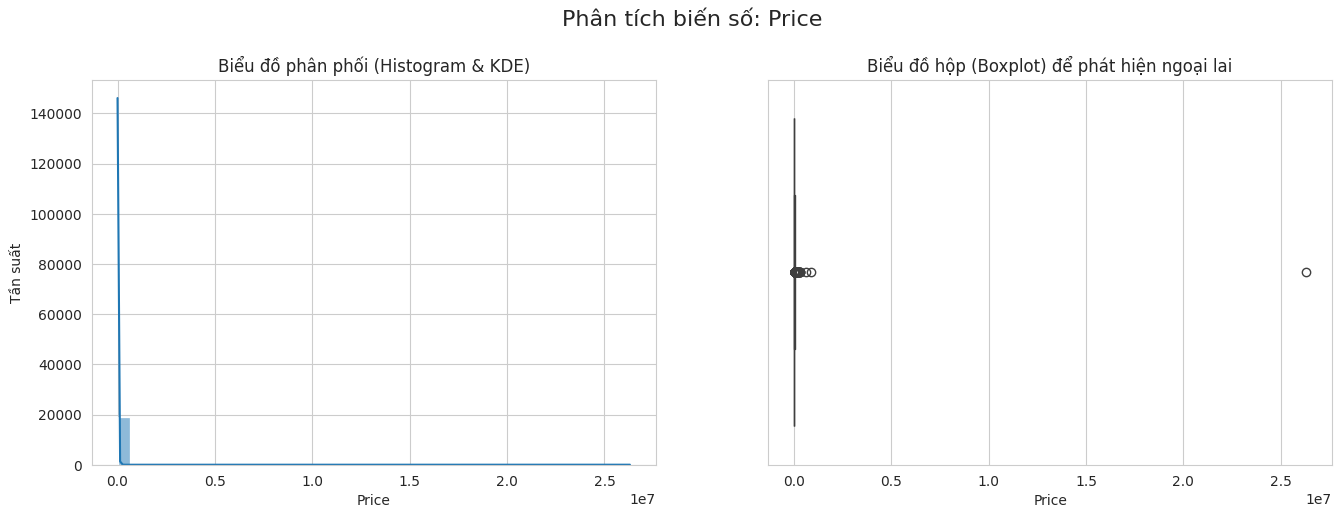

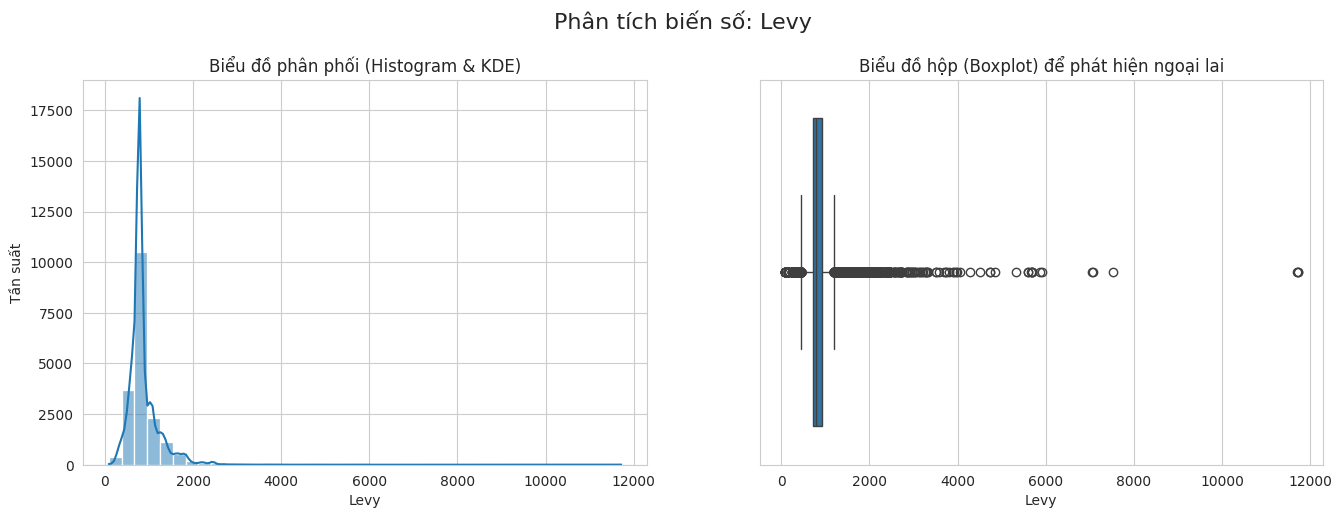

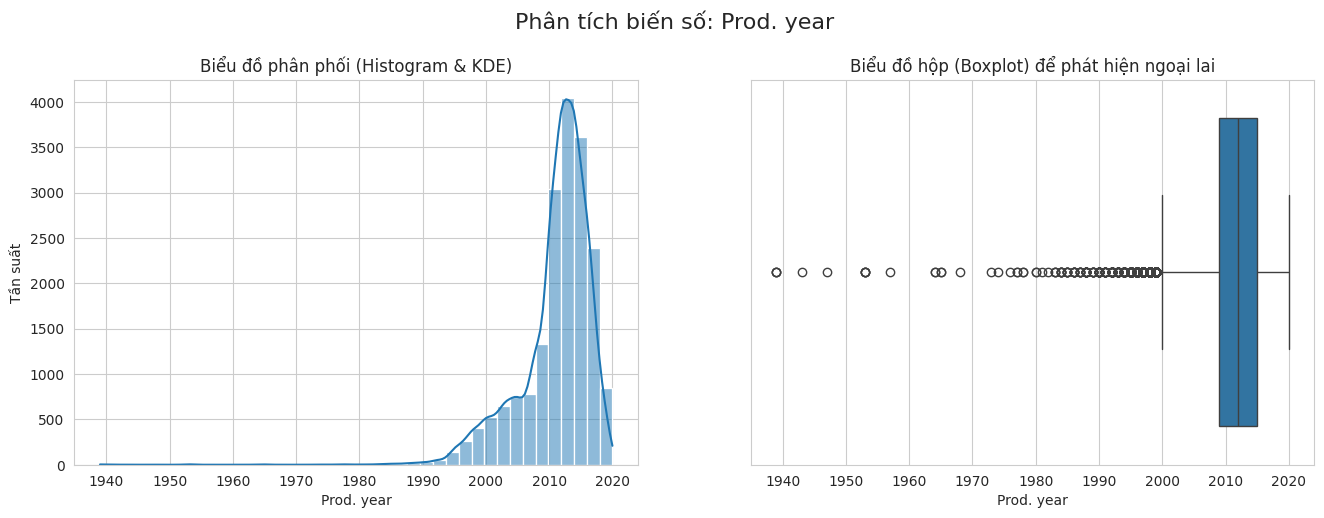

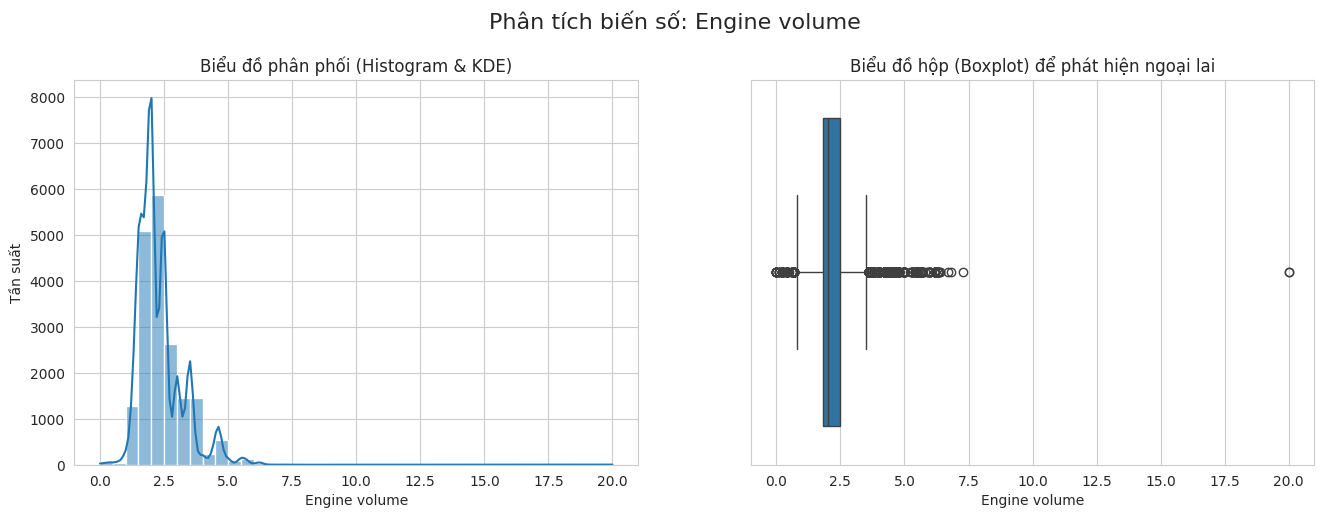

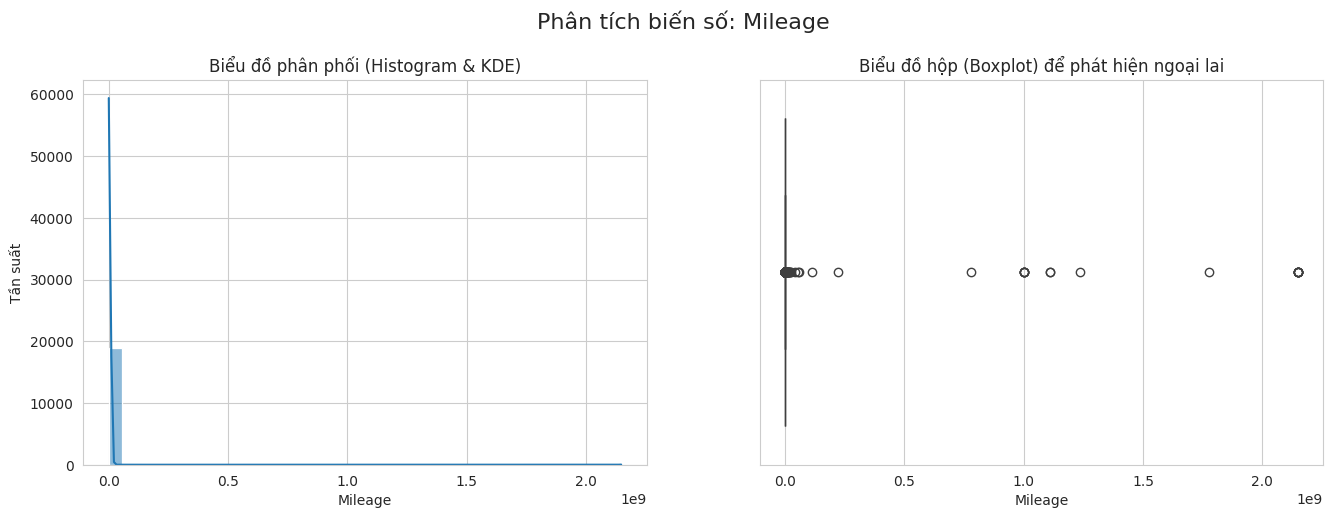

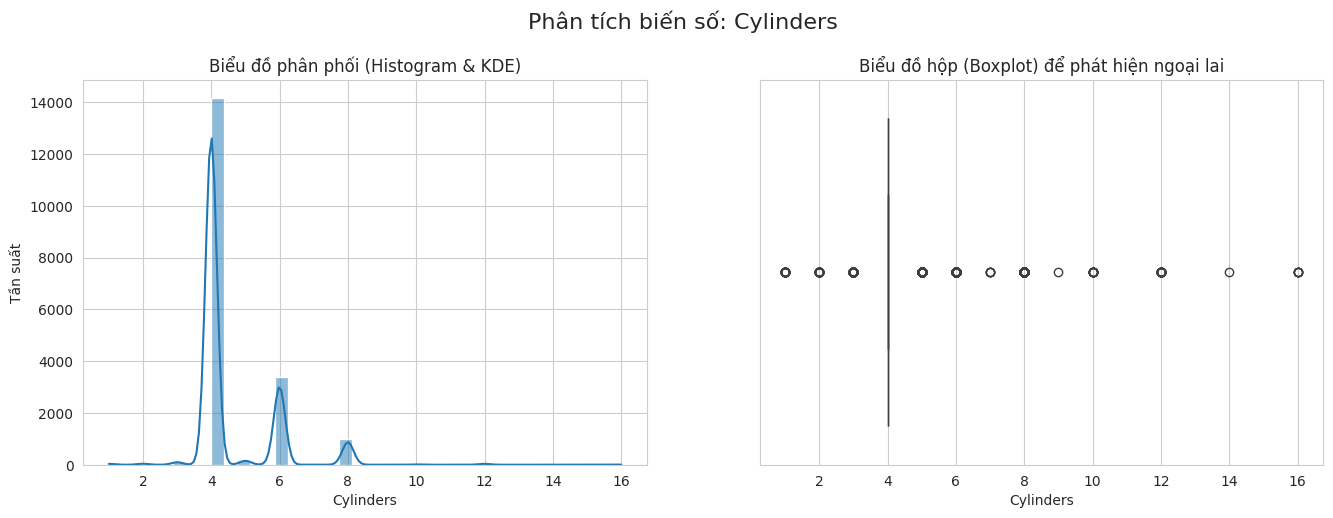

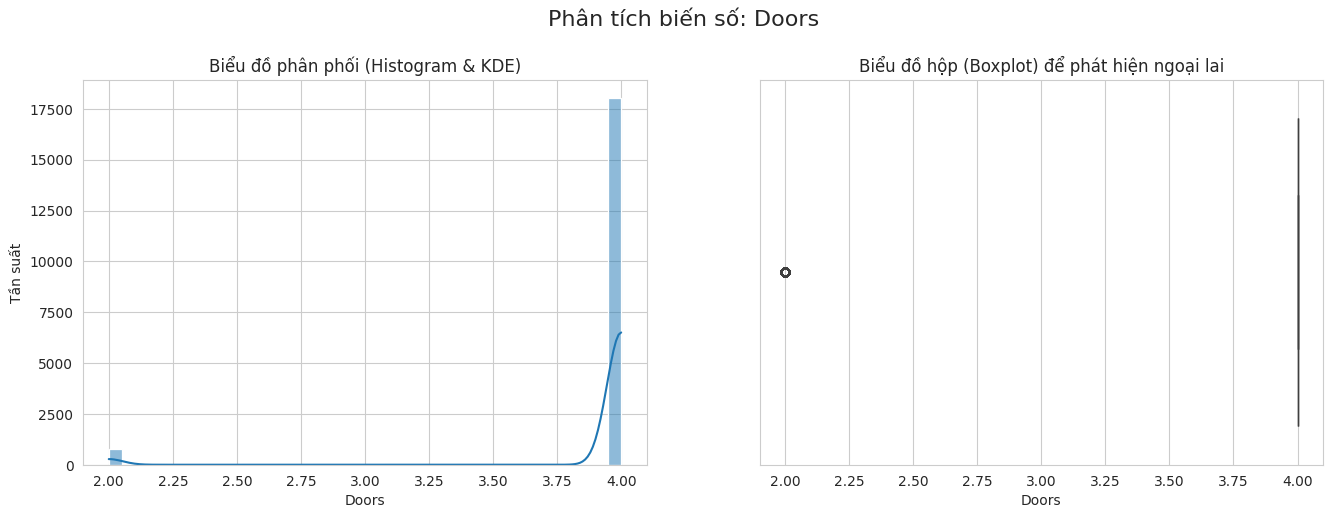

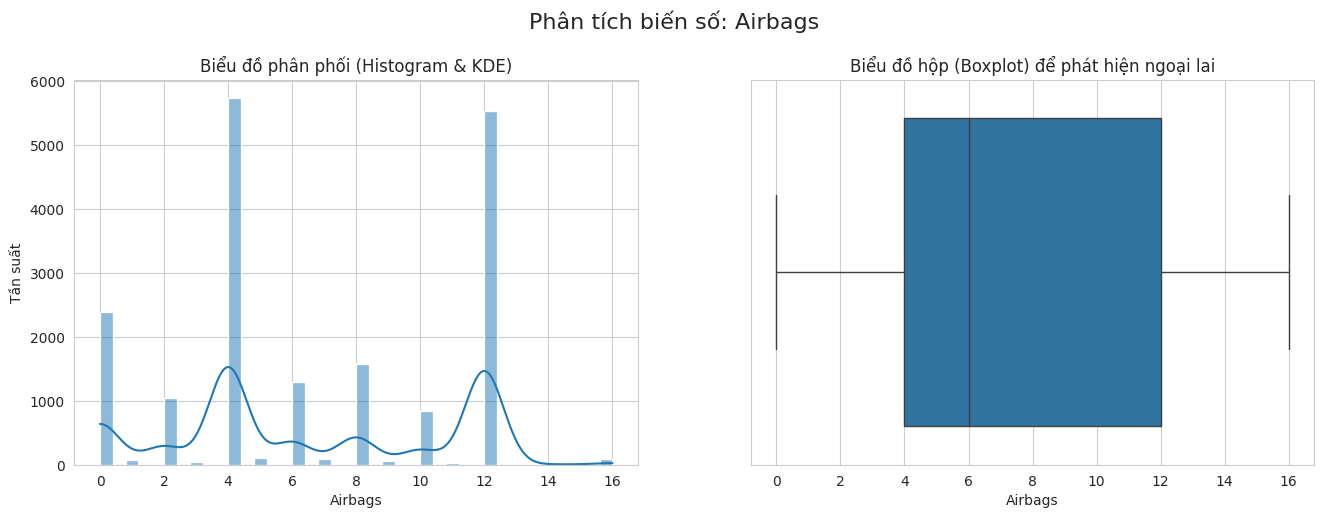

In [139]:
# Lấy danh sách các cột số (loại bỏ cột ID vì không có ý nghĩa thống kê)
numerical_cols = df.select_dtypes(include=np.number).columns.drop('ID', errors='ignore')

print("--- Phân tích phân phối và phát hiện ngoại lai cho các biến số ---")

for col in numerical_cols:
    # Tạo một figure mới cho mỗi cột
    plt.figure(figsize=(16, 5))
    plt.suptitle(f'Phân tích biến số: {col}', fontsize=16, y=1.02)

    # Biểu đồ 1: Histogram + KDE để xem hình dạng phân phối
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title('Biểu đồ phân phối (Histogram & KDE)')
    plt.xlabel(col)
    plt.ylabel('Tần suất')

    # Biểu đồ 2: Boxplot để phát hiện giá trị ngoại lai
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title('Biểu đồ hộp (Boxplot) để phát hiện ngoại lai')
    plt.xlabel(col)

    # Hiển thị cặp biểu đồ cho cột hiện tại
    plt.show()

#### **2.3.2 Phân phối của các biến phân loại (Categorical Features)**

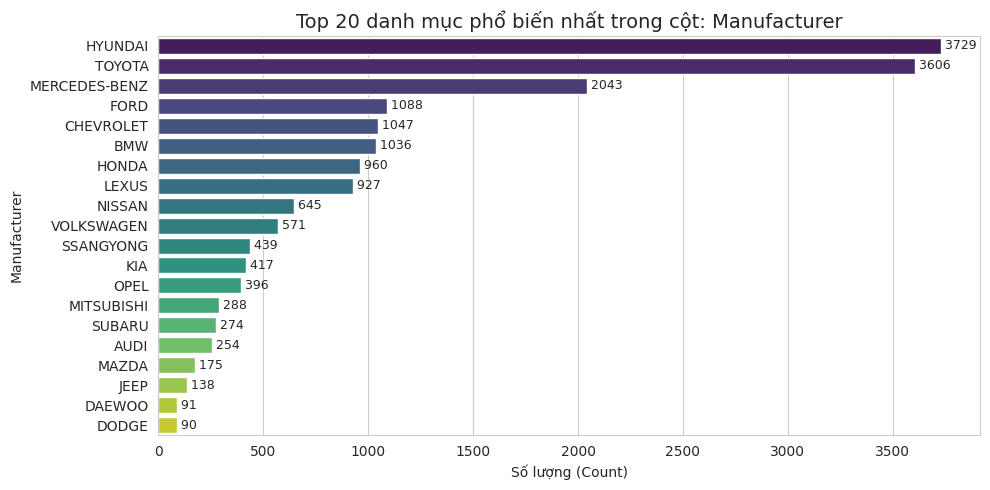

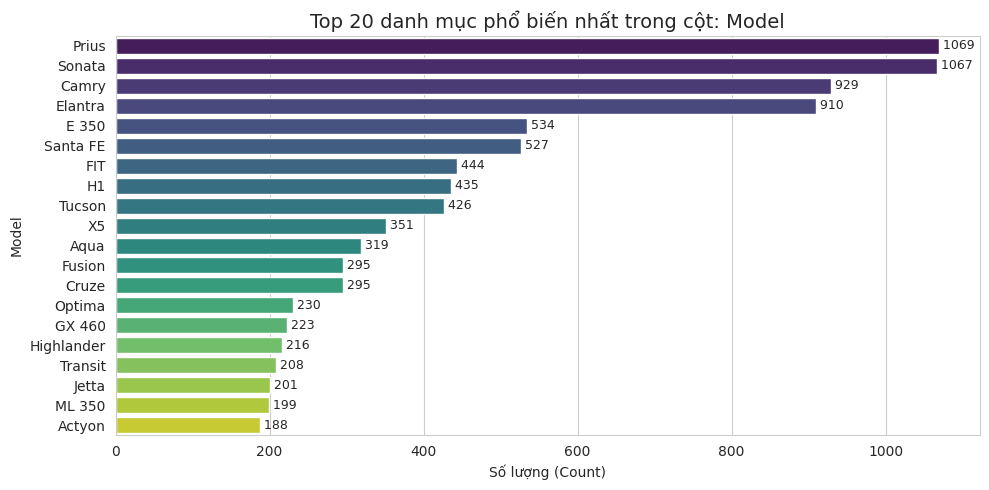

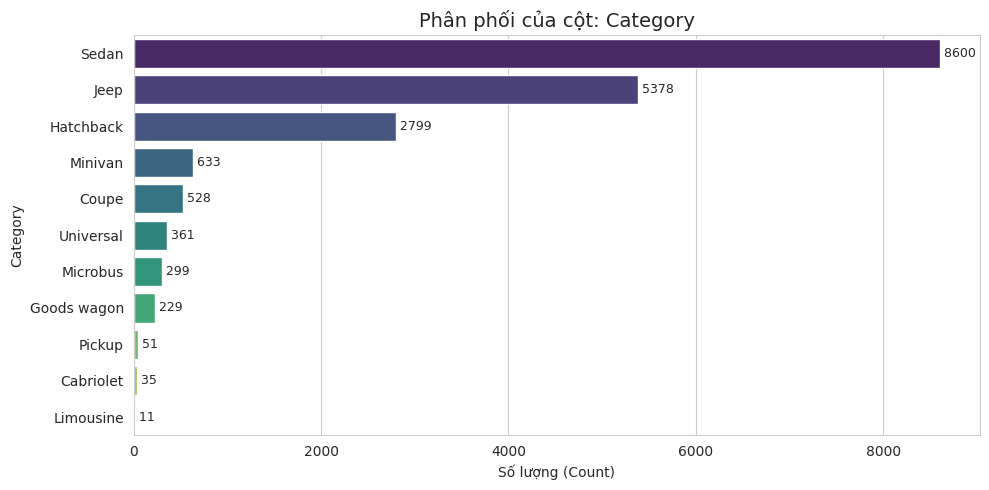

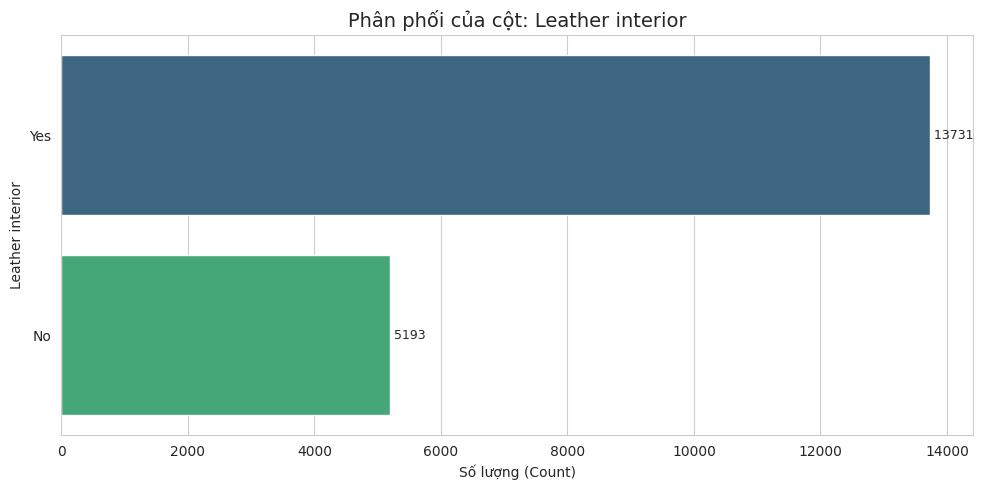

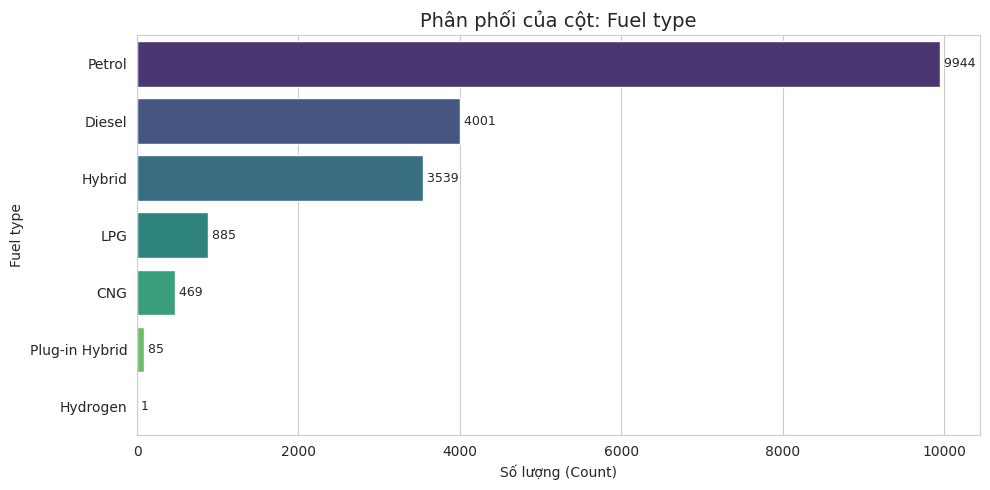

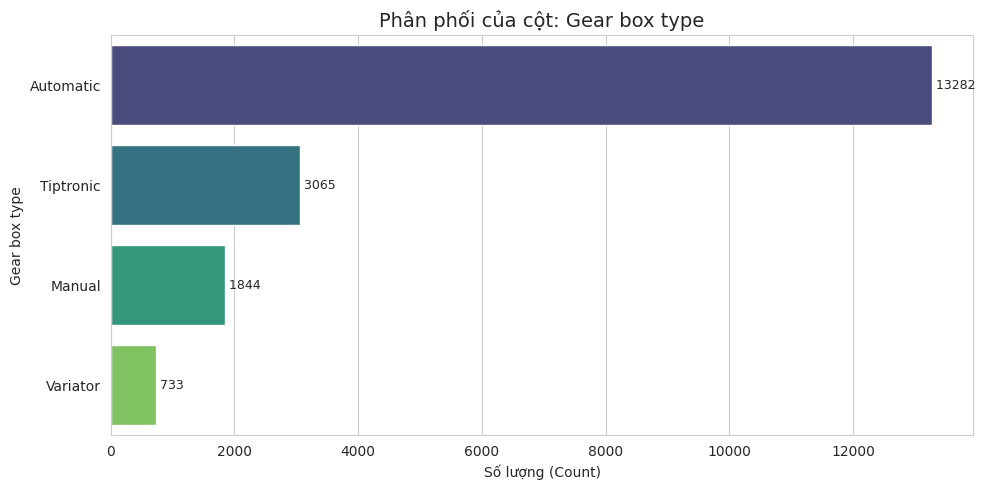

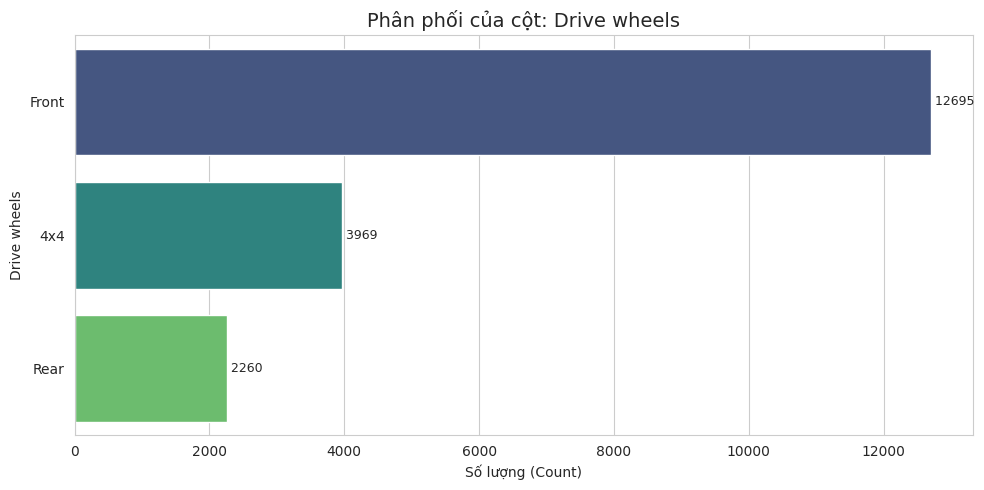

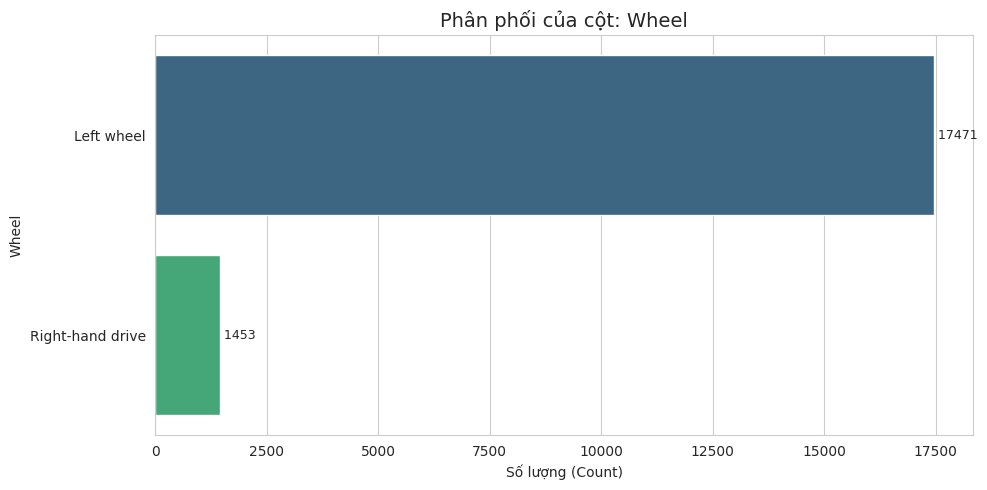

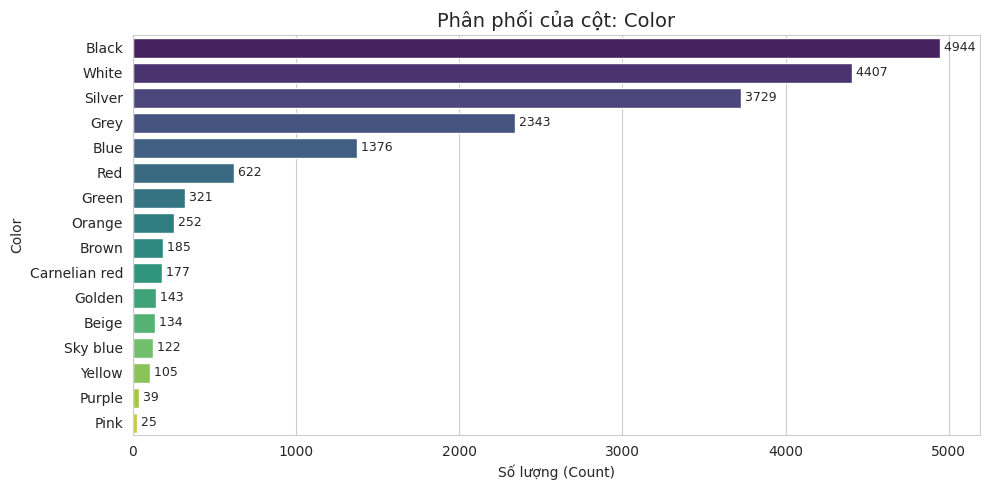

In [140]:
for col in categorical_cols:
    # Bỏ qua nếu cột không có giá trị duy nhất
    if df[col].nunique() == 0:
        continue

    num_categories = df[col].nunique()

    # Giảm kích thước biểu đồ cho gọn hơn
    # Chiều cao sẽ tự tăng nhẹ nếu có nhiều danh mục hơn
    fig_height = max(5, num_categories * 0.3) if 10 < num_categories <= 20 else 5
    plt.figure(figsize=(10, fig_height))

    # Lấy 20 giá trị phổ biến nhất nếu có quá nhiều danh mục
    if num_categories > 20:
        value_counts = df[col].value_counts().nlargest(20)
        title = f'Top 20 danh mục phổ biến nhất trong cột: {col}'
    else:
        value_counts = df[col].value_counts()
        title = f'Phân phối của cột: {col}'

    # Vẽ biểu đồ thanh ngang để dễ đọc tên các danh mục
    ax = sns.barplot(x=value_counts.values, y=value_counts.index, hue=value_counts.index, palette='viridis', legend=False)

    plt.title(title, fontsize=14)
    plt.xlabel('Số lượng (Count)', fontsize=10)
    plt.ylabel(col, fontsize=10)

    # Thêm nhãn số lượng vào cuối mỗi thanh
    for index, value in enumerate(value_counts):
        ax.text(value, index, f' {value}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

#### **2.3.3 Tương quan**

<Axes: >

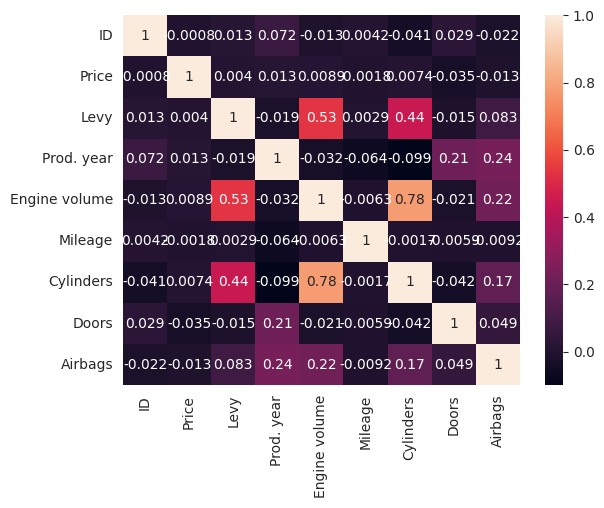

In [141]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

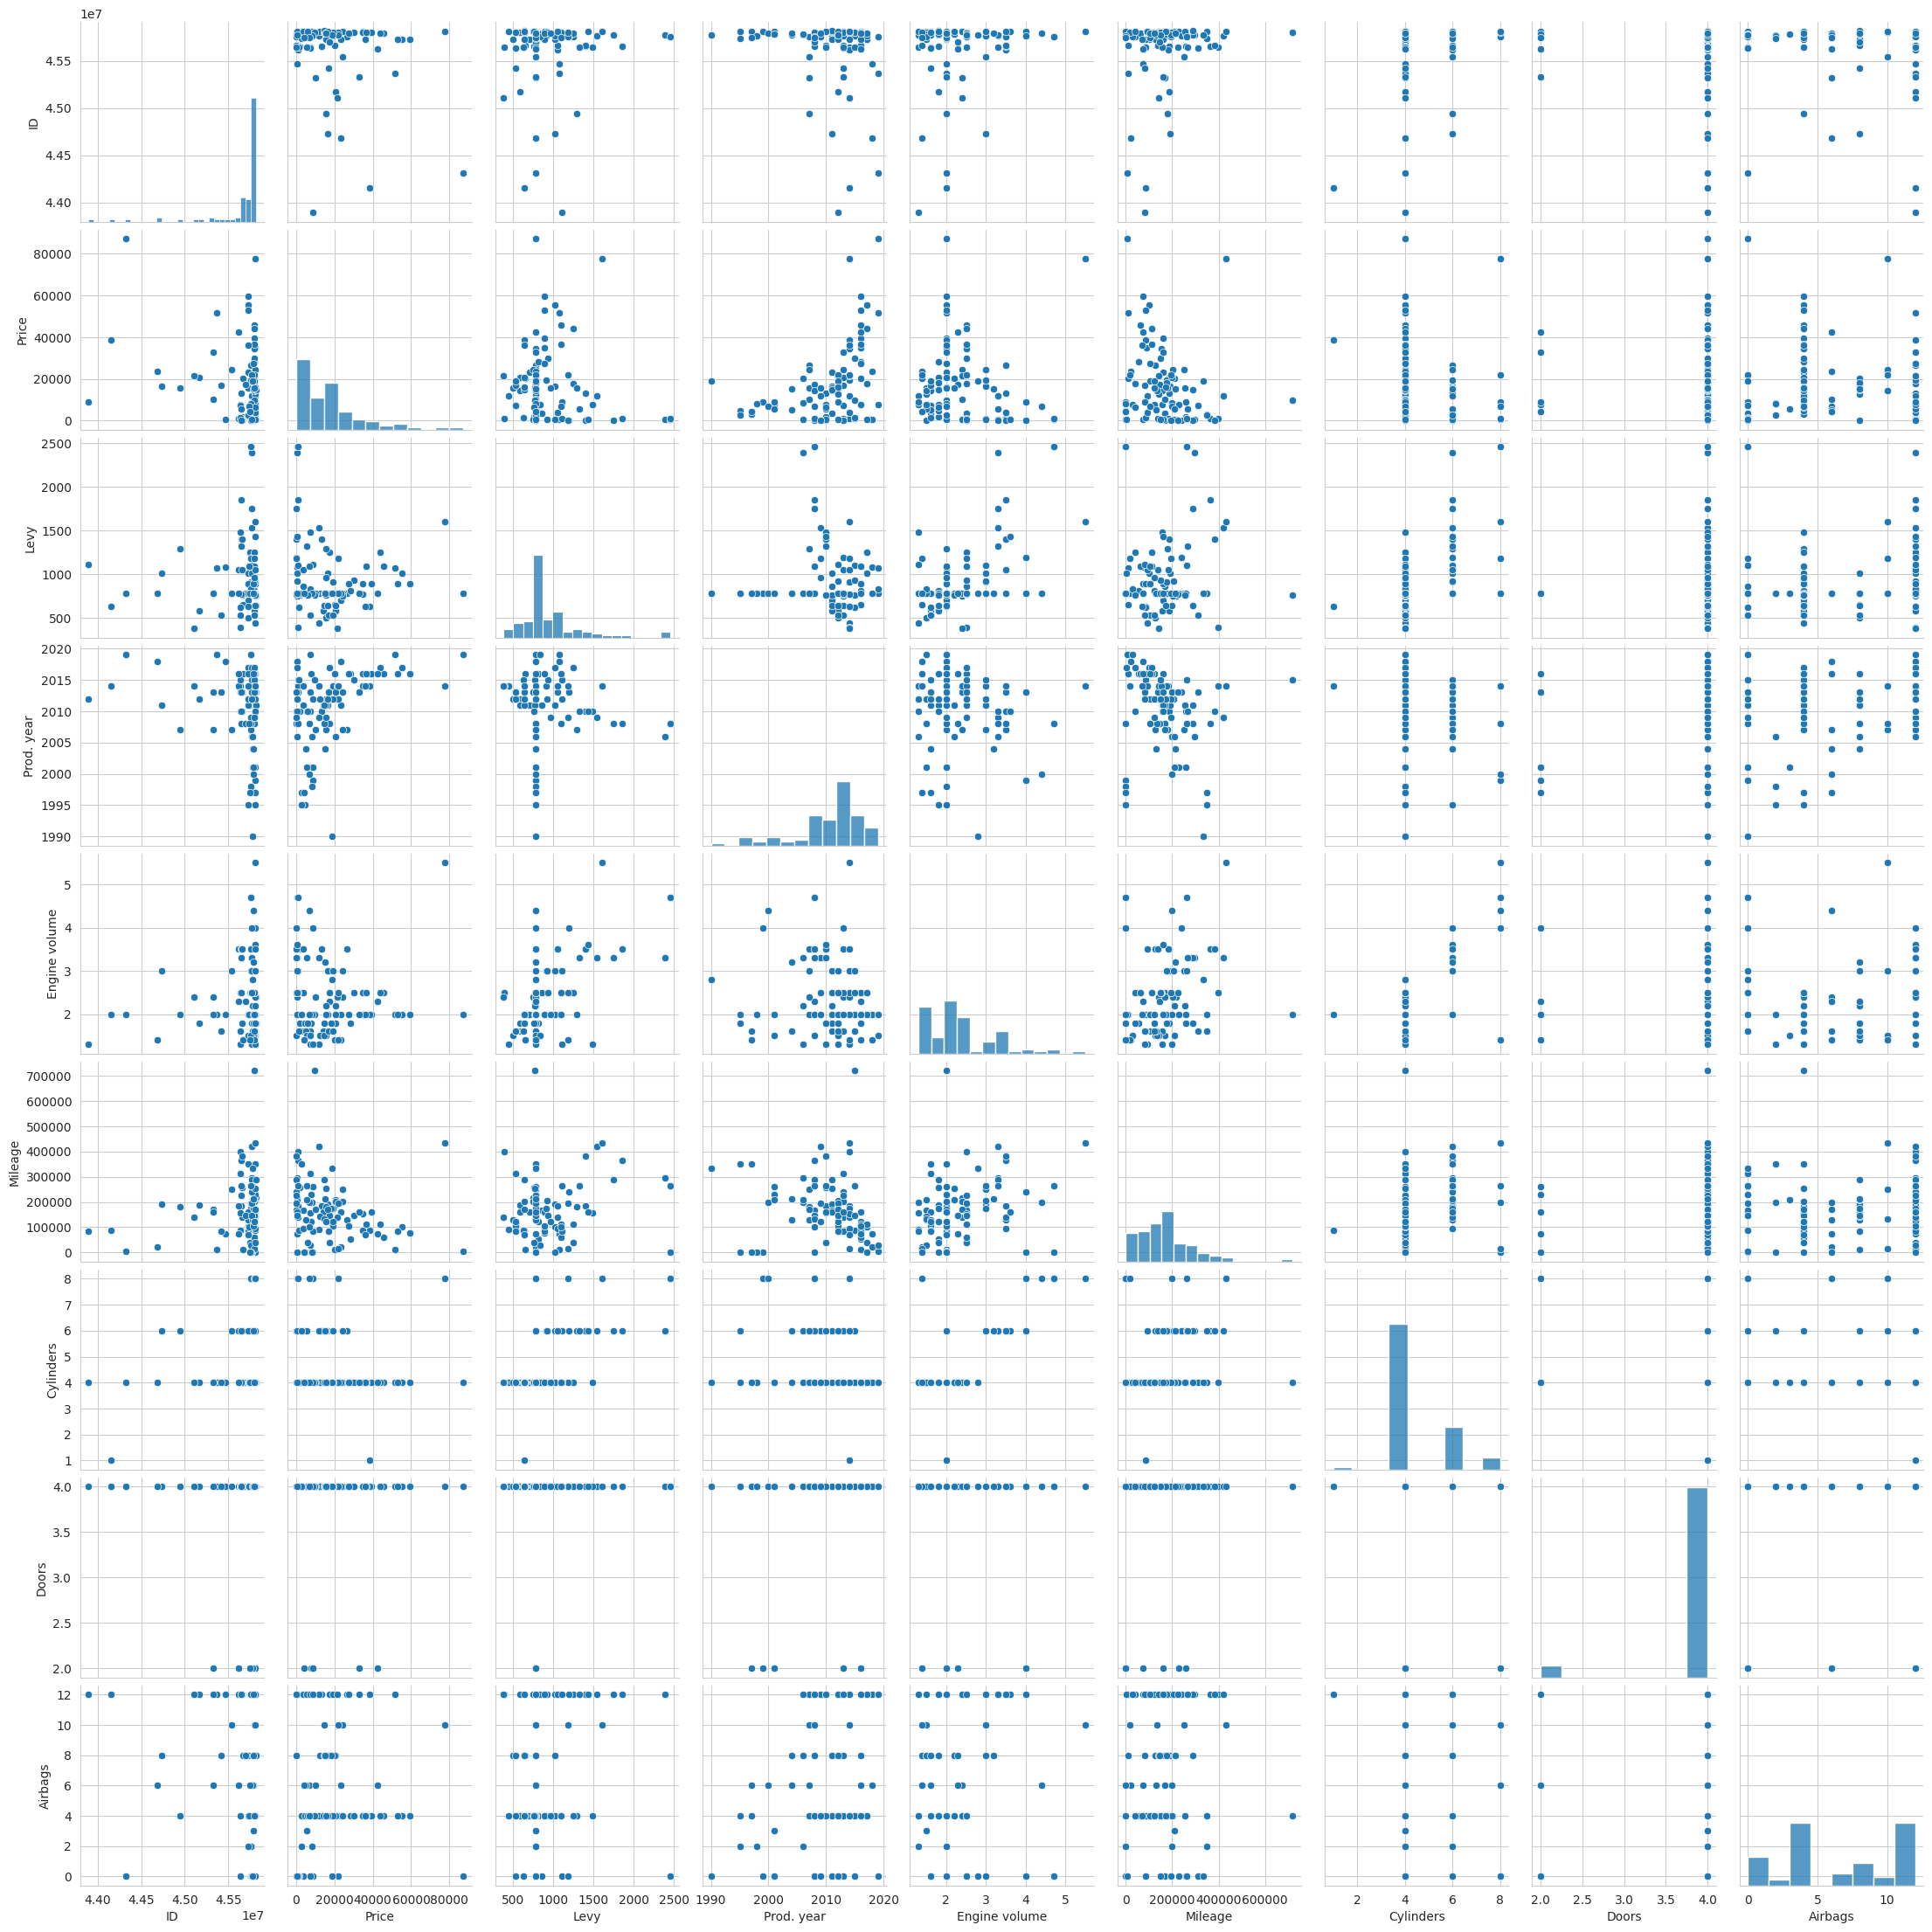

In [142]:
sns.pairplot(df[:100])

### **2.4 Chuẩn bị dữ liệu cho mô hình (Data Preparation for Modeling)**

#### **2.4.1 Xử lí điểm ngoại lai**

In [143]:
def clean_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    # df[col] = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] # Remove Outliers
    # Replace Outliers with Upper Bound if Above Or with Lower Bound If Below
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    # df[col] = np.wher(df[col] < lower_bound, lower_bound, df[col])
    # df[col] = np.wher(df[col] > upper_bound, upper_bound, df[col])
    return df

In [144]:
for col in ["Price", "Mileage", "Levy"]:
    df = clean_outliers(df, col)


Bỏ qua cột 'Manufacturer' vì có quá nhiều giá trị duy nhất (65).

Bỏ qua cột 'Model' vì có quá nhiều giá trị duy nhất (1590).


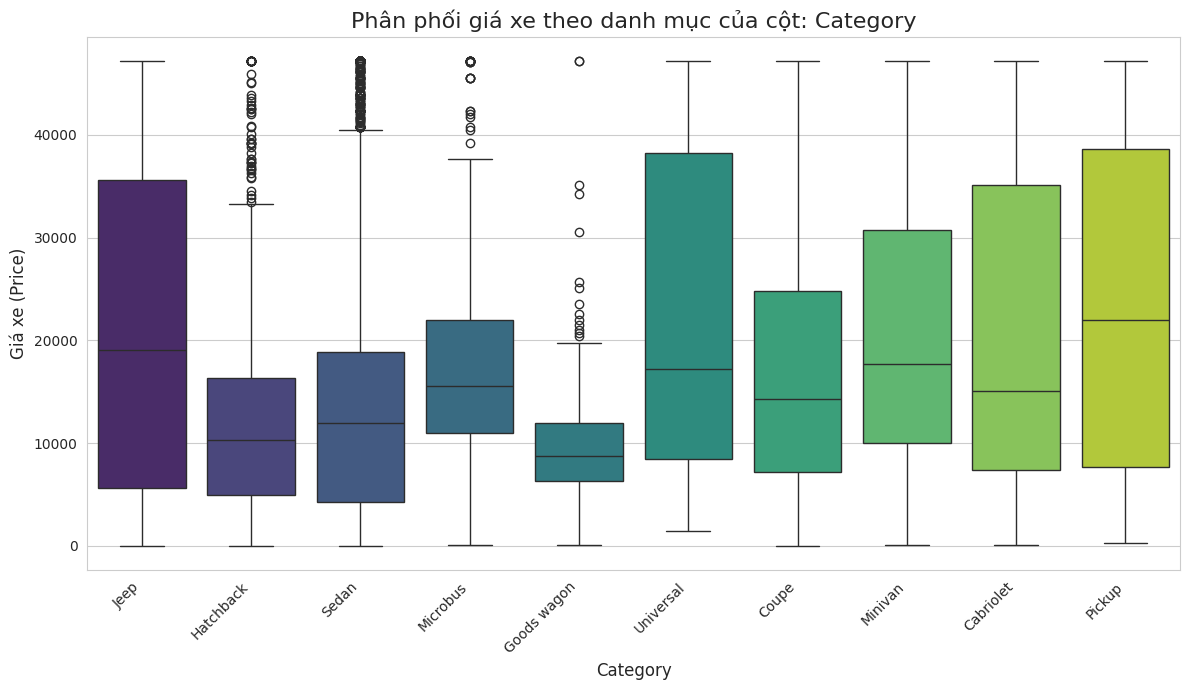

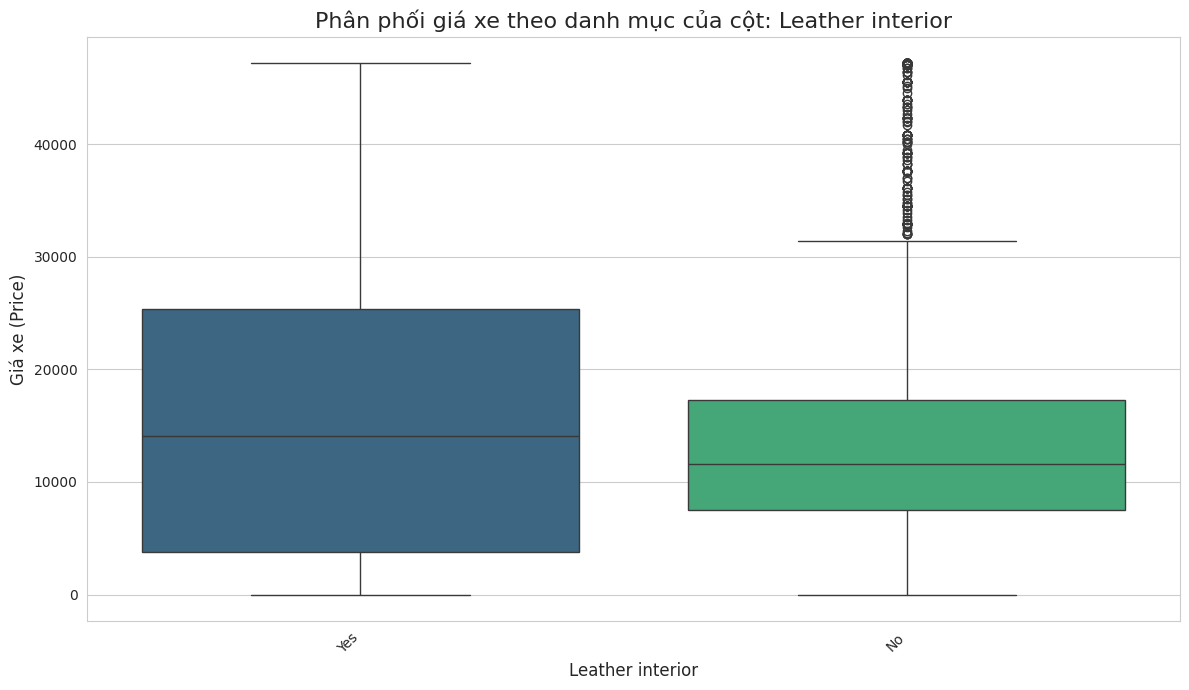

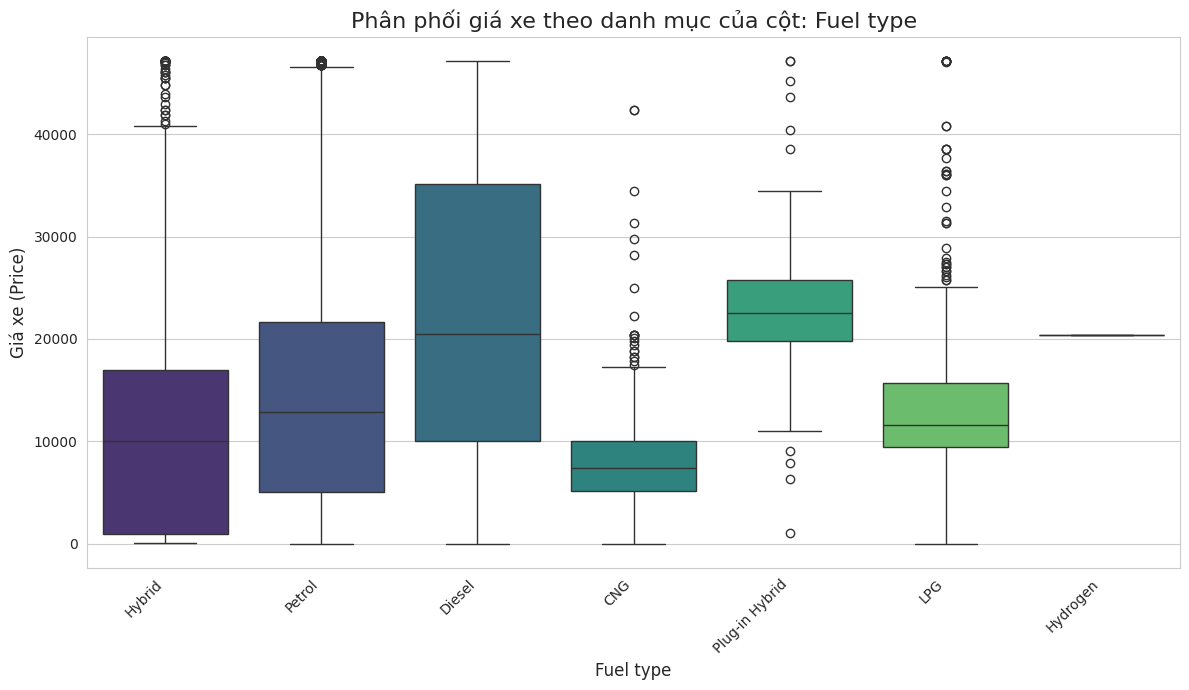

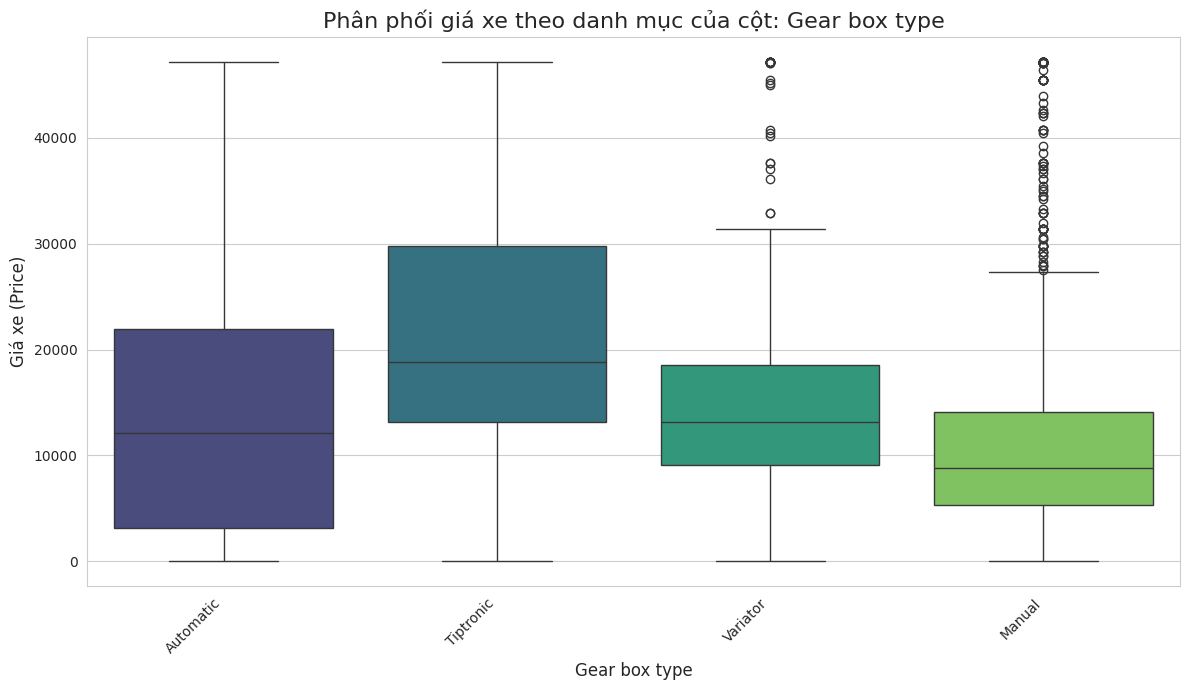

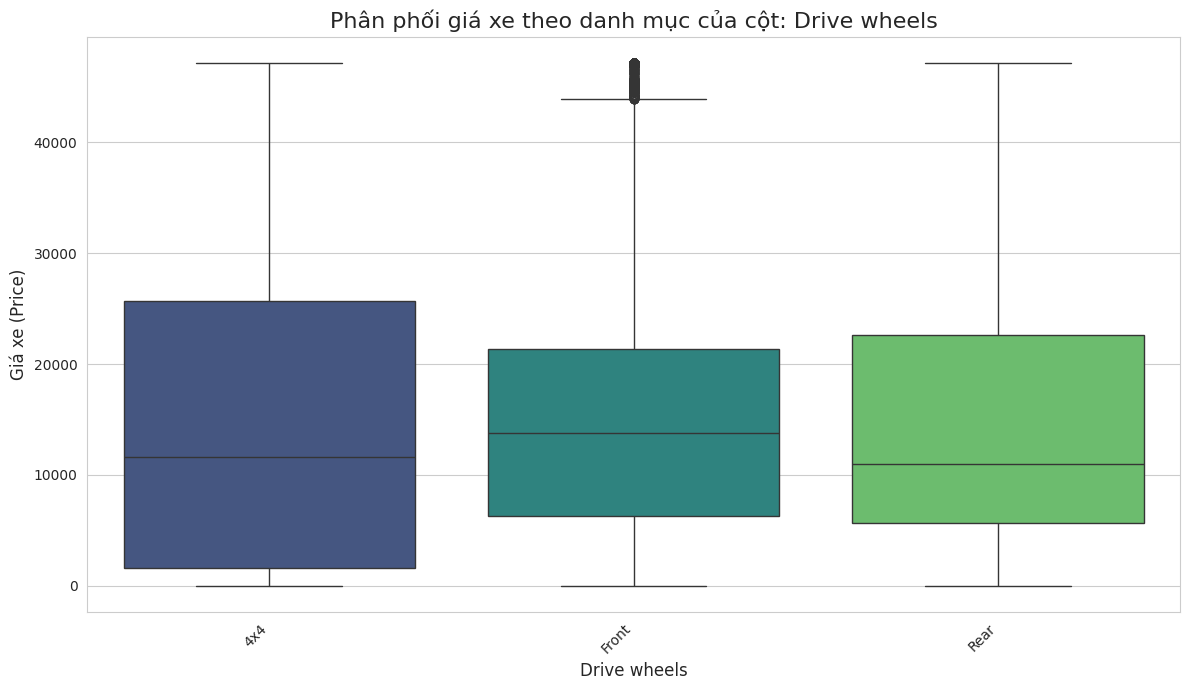

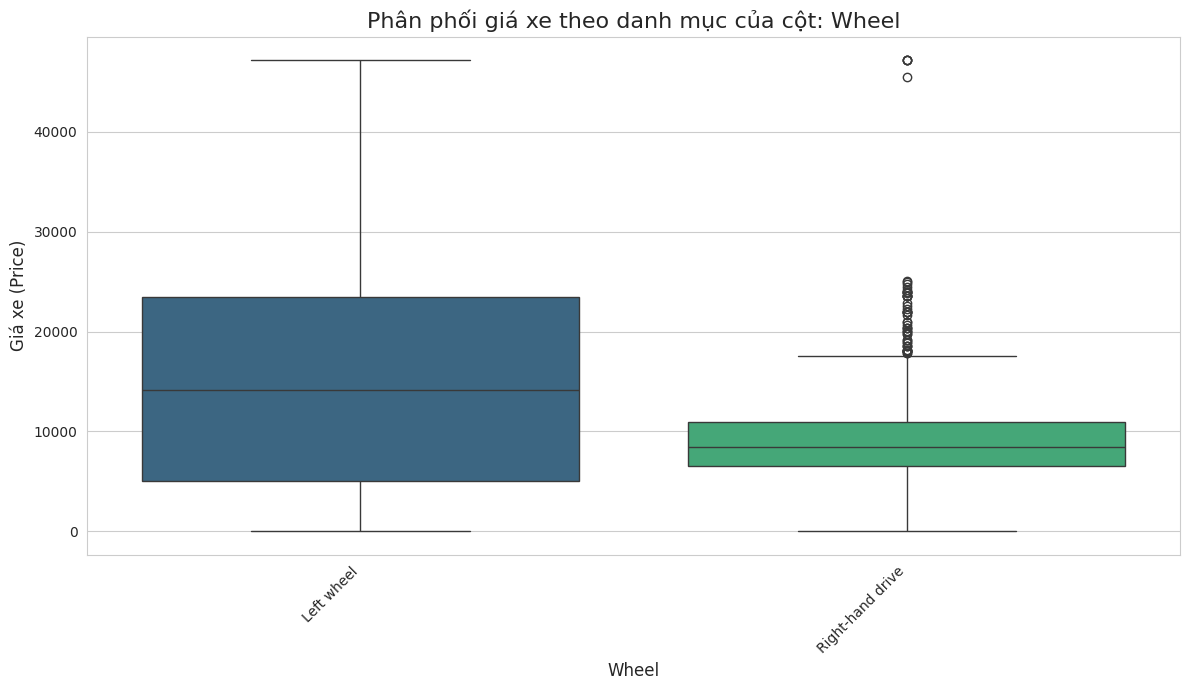

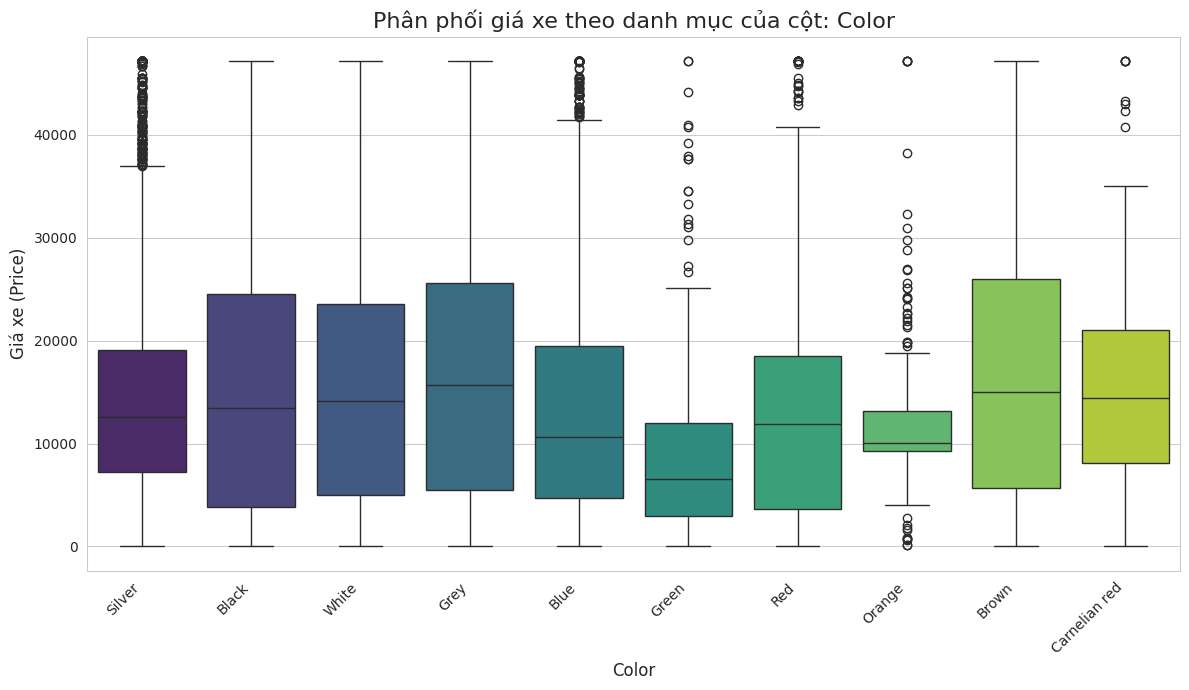

In [145]:
# Lấy danh sách các cột phân loại
categorical_cols_to_plot = df.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols_to_plot:
    if df[col].nunique() > 50:
        print(f"\nBỏ qua cột '{col}' vì có quá nhiều giá trị duy nhất ({df[col].nunique()}).")
        continue

    plt.figure(figsize=(12, 7))

    top_10_categories = df[col].value_counts().nlargest(10).index
    df_filtered = df[df[col].isin(top_10_categories)]

    # --- SỬA LỖI WARNING TẠI ĐÂY ---
    # Gán `x` cho `hue` và thêm `legend=False`
    sns.boxplot(
        data=df_filtered,
        x=col,
        y='Price',
        hue=col,            # Gán biến x cho hue
        palette='viridis',
        legend=False        # Tắt chú thích
    )

    plt.title(f'Phân phối giá xe theo danh mục của cột: {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Giá xe (Price)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


--- Phân tích mối quan hệ giữa các biến số đặc biệt và giá xe ---


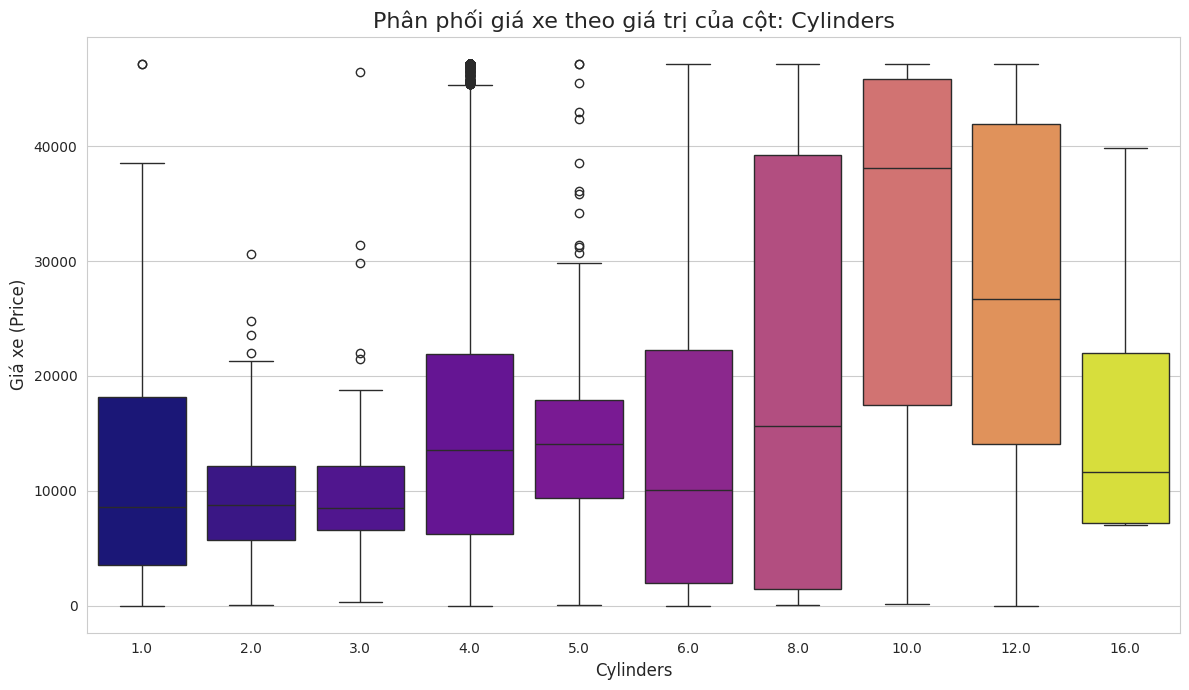

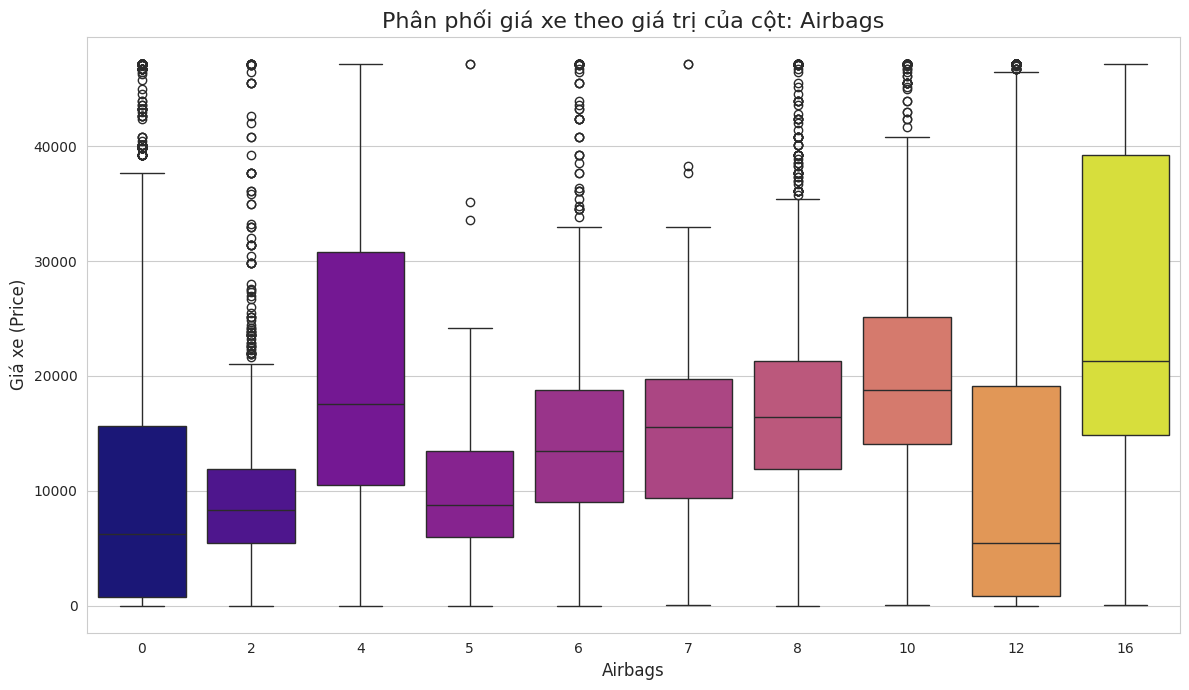

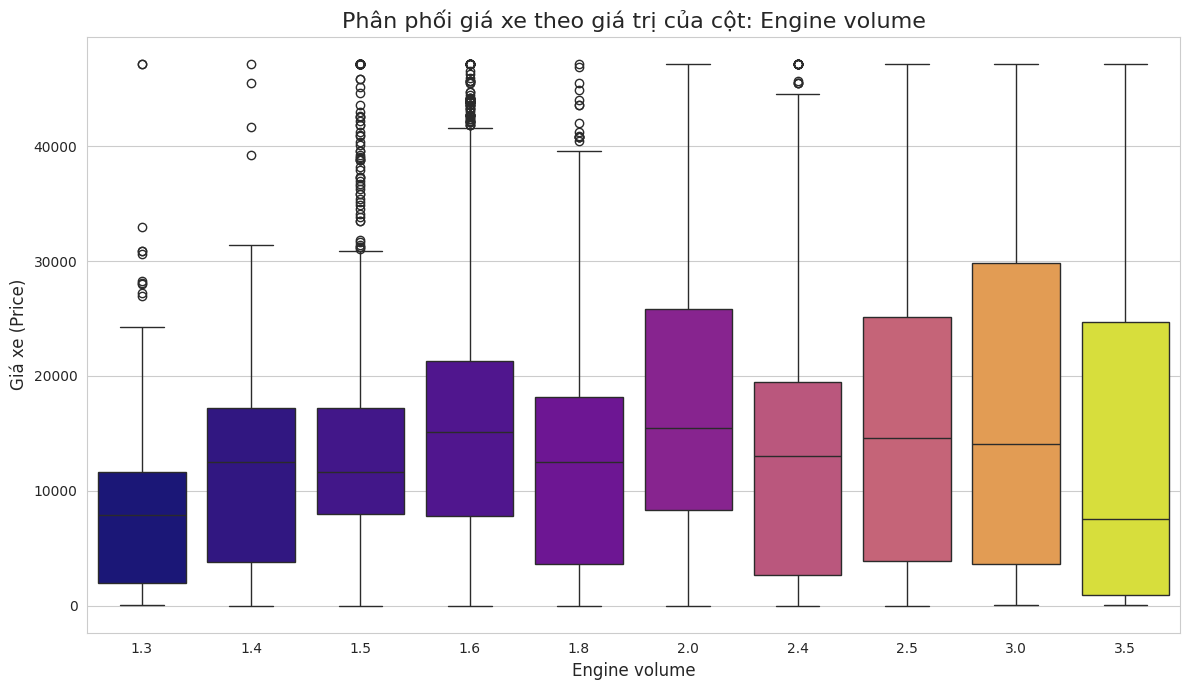

In [146]:
# Các cột này là số nhưng có ít giá trị duy nhất, có thể coi như phân loại
cols_to_analyze = ["Cylinders", "Airbags", "Engine volume"]

print("\n--- Phân tích mối quan hệ giữa các biến số đặc biệt và giá xe ---")

for col in cols_to_analyze:
    # Lấy 10 giá trị phổ biến nhất để biểu đồ không quá đông đúc
    top_values = df[col].value_counts().nlargest(10).index
    filtered_df = df[df[col].isin(top_values)]

    plt.figure(figsize=(12, 7))

    # --- THÊM MÀU SẮC VÀ SỬA LỖI WARNING TẠI ĐÂY ---
    sns.boxplot(
        data=filtered_df,
        x=col,
        y="Price",
        hue=col,            # Gán biến x cho hue
        palette='plasma',   # Thêm palette màu, ví dụ 'plasma'
        legend=False        # Tắt chú thích
    )

    plt.title(f'Phân phối giá xe theo giá trị của cột: {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Giá xe (Price)', fontsize=12)
    plt.tight_layout()
    plt.show()

#### **2.4.2 Mã hóa dữ liệu Encoding & chuẩn hóa dữ liệu (Scaling)**

Trong phần này, chúng ta sẽ thực hiện các bước cuối cùng để chuẩn bị dữ liệu trước khi đưa vào mô hình:
1.  **Feature Engineering:** Tạo đặc trưng mới `Car_Age` từ `Prod. year`.
2.  **Encoding:** Mã hóa các biến phân loại bằng One-Hot Encoding.
3.  **Scaling:** Chuẩn hóa các biến số bằng `StandardScaler`.
4.  **Splitting:** Chia dữ liệu thành tập huấn luyện và tập kiểm tra.

In [147]:

print("--- Bắt đầu quá trình chuẩn bị dữ liệu cho mô hình ---")

# --- 1. Feature Engineering: Tạo cột 'Car_Age' ---
current_year = 2025 # Dựa trên ngày hiện tại
df['Car_Age'] = current_year - df['Prod. year']
print("Đã tạo đặc trưng 'Car_Age' và loại bỏ các cột không cần thiết.")
df_model = df.drop(['ID', 'Prod. year'], axis=1)
# --- 2. Tách biến mục tiêu (y) và các biến đặc trưng (X) ---
X = df_model.drop('Price', axis=1)
y = df_model['Price']

# --- 3. Xác định các cột số và cột phân loại ---
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

print(f"\nCác cột số sẽ được chuẩn hóa (Scaled): {list(numerical_features)}")
print(f"Các cột phân loại sẽ được mã hóa (Encoded): {list(categorical_features)}")

# --- 4. Chia dữ liệu thành tập huấn luyện và tập kiểm tra ---
# Rất quan trọng: Mọi phép biến đổi phải được 'fit' trên tập train và 'transform' trên cả hai
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nĐã chia dữ liệu: {len(X_train)} mẫu huấn luyện và {len(X_test)} mẫu kiểm tra.")

# --- 5. Xây dựng bộ tiền xử lý với ColumnTransformer ---
# Pipeline cho các biến số: Áp dụng StandardScaler
numeric_transformer = StandardScaler()

# Pipeline cho các biến phân loại: Áp dụng OneHotEncoder
# handle_unknown='ignore' để tránh lỗi nếu tập test có giá trị mà tập train không có
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Kết hợp hai pipeline trên bằng ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Giữ lại các cột không được chỉ định (nếu có)
)

# --- 6. Áp dụng bộ tiền xử lý vào dữ liệu ---
# Fit và transform trên tập huấn luyện
X_train_processed = preprocessor.fit_transform(X_train)

# Chỉ transform trên tập kiểm tra (sử dụng các tham số đã học từ tập train)
X_test_processed = preprocessor.transform(X_test)

print("\n--- Quá trình chuẩn bị dữ liệu hoàn tất! ---")
print(f"Kích thước dữ liệu huấn luyện sau khi xử lý: {X_train_processed.shape}")
print(f"Kích thước dữ liệu kiểm tra sau khi xử lý: {X_test_processed.shape}")

--- Bắt đầu quá trình chuẩn bị dữ liệu cho mô hình ---
Đã tạo đặc trưng 'Car_Age' và loại bỏ các cột không cần thiết.

Các cột số sẽ được chuẩn hóa (Scaled): ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags', 'Car_Age']
Các cột phân loại sẽ được mã hóa (Encoded): ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']

Đã chia dữ liệu: 15139 mẫu huấn luyện và 3785 mẫu kiểm tra.

--- Quá trình chuẩn bị dữ liệu hoàn tất! ---
Kích thước dữ liệu huấn luyện sau khi xử lý: (15139, 1508)
Kích thước dữ liệu kiểm tra sau khi xử lý: (3785, 1508)
